In [1]:
!pip install requests
!pip install yfinance

     |████████████████████████████████| 5.5MB 18.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=a376672367dd8dea49e0d7e62d17ae2907e2b232071b26c0720a84d2e774cdd9
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests

import io
import matplotlib.pyplot as plt
import numpy as np

In [6]:
start = datetime.datetime(2021,4,1)
end = datetime.datetime(2021,4,30)

In [7]:
df=pd.read_csv('merged_data.csv',index_col='Name')

In [8]:
df.head()

,Industry,01-04-2021,05-04-2021,06-04-2021,07-04-2021,08-04-2021,09-04-2021,12-04-2021,13-04-2021,14-04-2021,15-04-2021,16-04-2021,19-04-2021,20-04-2021,21-04-2021,22-04-2021,23-04-2021,26-04-2021,27-04-2021,28-04-2021,29-04-2021
Name,,,,,,,,,,,,,,,,,,,,,
AMSF,Accident &Health Insurance,63.759998,63.900002,63.200001,63.250000,63.990002,65.160004,65.800003,64.980003,64.650002,64.449997,64.500000,64.879997,64.620003,65.120003,64.300003,64.260002,62.650002,61.900002,62.360001,62.400002
TIPT,Accident &Health Insurance,9.490000,9.740000,9.720000,9.930000,10.130000,10.040000,10.000000,10.080000,9.840000,9.680000,10.100000,10.000000,11.210000,14.220000,12.360000,14.900000,14.730000,13.560000,12.550000,10.100000
CNET,Advertising,2.680000,2.590000,2.510000,2.480000,2.520000,2.480000,2.630000,2.420000,2.200000,2.100000,1.990000,1.830000,1.760000,1.810000,1.970000,2.010000,2.120000,2.050000,2.060000,2.040000
CRTO,Advertising,36.139999,35.650002,35.360001,35.630001,35.830002,35.939999,37.540001,38.060001,36.970001,37.240002,37.400002,35.450001,36.150002,36.959999,36.605000,36.580002,38.770000,38.549999,38.709999,40.169998
GRPN,Advertising,49.970001,50.150002,50.849998,50.130001,48.610001,48.730000,47.369999,48.070000,49.520000,51.139999,49.740002,49.080002,45.849998,45.200001,45.049999,45.520000,46.660000,48.189999,50.470001,52.590000


In [9]:
df2=df.groupby(['Industry','Name']).sum()

In [10]:
df2.head()

01-04-2021  05-04-2021  ...  28-04-2021  29-04-2021
Industry                   Name                          ...                        
Accident &Health Insurance AMSF   63.759998   63.900002  ...   62.360001   62.400002
                           TIPT    9.490000    9.740000  ...   12.550000   10.100000
Advertising                CNET    2.680000    2.590000  ...    2.060000    2.040000
                           CRTO   36.139999   35.650002  ...   38.709999   40.169998
                           GRPN   49.970001   50.150002  ...   50.470001   52.590000

[5 rows x 20 columns]

In [11]:
df3=df.groupby(['Industry']).sum()

In [12]:
df3.head()

,01-04-2021,05-04-2021,06-04-2021,07-04-2021,08-04-2021,09-04-2021,12-04-2021,13-04-2021,14-04-2021,15-04-2021,16-04-2021,19-04-2021,20-04-2021,21-04-2021,22-04-2021,23-04-2021,26-04-2021,27-04-2021,28-04-2021,29-04-2021
Industry,,,,,,,,,,,,,,,,,,,,
Accident &Health Insurance,73.249998,73.640001,72.920001,73.180000,74.120002,75.200004,75.800003,75.060003,74.490002,74.129997,74.600000,74.879997,75.830003,79.340003,76.660003,79.160002,77.380001,75.460002,74.910001,72.500002
Advertising,426.960006,434.480007,430.169999,427.890008,427.480006,427.070005,426.430004,423.449997,426.739999,429.129998,431.500007,429.980006,424.379997,429.690003,432.184993,437.759996,448.330002,452.330000,454.189987,466.219991
Aerospace,221.559999,223.110000,218.460003,214.820004,217.410005,216.620003,213.720000,214.370000,212.490003,211.360000,210.420001,206.980000,203.690005,208.510000,211.459999,214.900002,216.230002,214.329997,213.200001,211.600001
Agricultural Chemicals,3.720000,3.780000,3.790000,3.780000,3.800000,3.800000,3.770000,3.590000,3.750000,3.760000,3.790000,3.880000,3.910000,3.840000,3.950000,3.840000,3.880000,4.050000,4.100000,3.830000
Air Freight/Delivery Services,547.689999,553.420004,556.349997,549.559994,548.839991,547.180004,535.969999,535.130001,536.059996,534.450005,529.739998,525.550001,502.909998,517.990000,510.609997,527.080002,533.090002,531.260004,523.970007,528.049997


In [13]:
close_px = df3.iloc[0]

In [14]:
close_px

01-04-2021    73.249998
05-04-2021    73.640001
06-04-2021    72.920001
07-04-2021    73.180000
08-04-2021    74.120002
09-04-2021    75.200004
12-04-2021    75.800003
13-04-2021    75.060003
14-04-2021    74.490002
15-04-2021    74.129997
16-04-2021    74.600000
19-04-2021    74.879997
20-04-2021    75.830003
21-04-2021    79.340003
22-04-2021    76.660003
23-04-2021    79.160002
26-04-2021    77.380001
27-04-2021    75.460002
28-04-2021    74.910001
29-04-2021    72.500002
Name: Accident &Health Insurance, dtype: float64

In [15]:
mavg = close_px.rolling(window=10).mean()

In [35]:
mavg
df4 = pd.DataFrame(mavg)

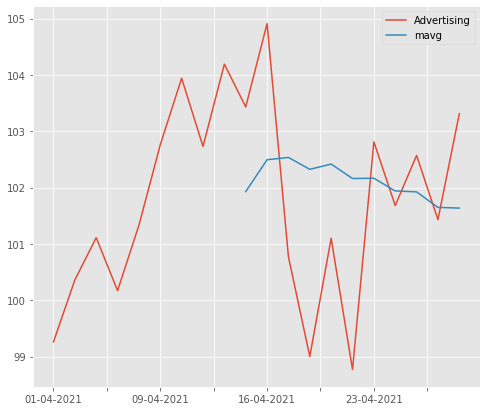

In [36]:
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='Advertising')
mavg.plot(label='mavg')
plt.legend()

In [37]:
df3.to_csv('generalisedata.csv')

In [38]:
for i in range(0,df3.shape[0]):
  close_px = df3.iloc[i]
  mavg = close_px.rolling(window=10).mean()
  df4 = df4.append(mavg)

In [45]:
df4=df4.iloc[20:]

In [47]:
df4=df4.drop(df4.columns[0], axis=1)

In [48]:
df4.head()

,01-04-2021,05-04-2021,06-04-2021,07-04-2021,08-04-2021,09-04-2021,12-04-2021,13-04-2021,14-04-2021,15-04-2021,16-04-2021,19-04-2021,20-04-2021,21-04-2021,22-04-2021,23-04-2021,26-04-2021,27-04-2021,28-04-2021,29-04-2021
Accident &Health Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.179001,74.314001,74.438001,74.729001,75.345001,75.599002,75.995001,76.153001,76.193001,76.235001,76.072001
Advertising,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427.980003,428.434003,427.984003,427.405003,427.585002,428.055501,429.124500,431.314500,434.202500,436.947499,440.656498
Aerospace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.392002,215.278002,213.665002,212.188002,211.557002,210.962001,210.790001,211.041001,211.037001,211.108001,211.132001
Agricultural Chemicals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.754000,3.761000,3.771000,3.783000,3.789000,3.804000,3.808000,3.819000,3.865000,3.900000,3.907000
Air Freight/Delivery Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544.464999,542.669999,539.882998,534.538999,531.381999,527.559000,525.549000,525.261000,524.874000,523.665001,523.025001


In [49]:
df4.to_csv('MovingAverage.csv')

In [50]:
df5=df3.T

In [51]:
df5.head()

Industry,Accident &Health Insurance,Advertising,Aerospace,Agricultural Chemicals,Air Freight/Delivery Services,Aluminum,Apparel,Assisted Living Services,Auto Manufacturing,Auto Parts:O.E.M.,Automotive Aftermarket,Banks,Beverages (Production/Distribution),Biotechnology: Biological Products (No Diagnostic Substances),Biotechnology: Commercial Physical & Biological Resarch,Biotechnology: Electromedical & Electrotherapeutic Apparatus,Biotechnology: In Vitro & In Vivo Diagnostic Substances,Biotechnology: Laboratory Analytical Instruments,Books,Broadcasting,Building Materials,Building Products,Building operators,Business Services,Catalog/Specialty Distribution,Clothing/Shoe/Accessory Stores,Coal Mining,Commercial Banks,Computer Communications Equipment,Computer Manufacturing,Computer Software: Prepackaged Software,Computer Software: Programming Data Processing,Computer peripheral equipment,Construction/Ag Equipment/Trucks,Consumer Electronics/Appliances,Consumer Electronics/Video Chains,Consumer Specialties,Containers/Packaging,Department/Specialty Retail Stores,Diversified Commercial Services,...,Other Metals and Minerals,Other Pharmaceuticals,Other Specialty Stores,Package Goods/Cosmetics,Packaged Foods,Paper,Plastic Products,Pollution Control Equipment,Power Generation,Precious Metals,Precision Instruments,Professional Services,Property-Casualty Insurers,RETAIL: Building Materials,Radio And Television Broadcasting And Communications Equipment,Railroads,Real Estate,Real Estate Investment Trusts,Recreational Products/Toys,Rental/Leasing Companies,Restaurants,Retail: Computer Software & Peripheral Equipment,Savings Institutions,Semiconductors,Service to the Health Industry,Services-Misc. Amusement & Recreation,Shoe Manufacturing,Specialty Chemicals,Specialty Foods,Specialty Insurers,Steel/Iron Ore,Telecommunications Equipment,Television Services,Textiles,Tobacco,Transportation Services,Trucking Freight/Courier Services,Trusts Except Educational Religious and Charitable,Water Supply,Wholesale Distributors
01-04-2021,73.249998,426.960006,221.559999,3.72,547.689999,128.379997,121.149998,28.610001,753.779999,313.429995,60.310001,411.809999,437.720015,1452.260009,842.240017,277.660000,867.729982,376.329996,47.959999,369.200000,66.269997,298.760001,34.780000,1564.689995,4850.449997,310.780001,7.85,244.129995,3.59,208.459999,5143.740016,219.699997,1036.009996,177.320002,128.470001,21.330000,15.41,94.570004,793.659994,836.869993,...,136.449997,20.660000,1166.040005,86.320003,304.700005,14.62,4.69,11.05,10.64,42.140000,48.529999,340.929997,795.029996,47.369999,163.000000,6.65,938.620006,1468.645992,853.169996,688.459999,1014.540006,592.139997,603.360000,5186.269984,260.870000,244.949996,196.589998,67.890001,431.609997,577.229989,217.150001,840.865002,1229.340014,7.75,142.519999,61.230000,1055.759993,140.609998,368.230000,99.260002
05-04-2021,73.640001,434.480007,223.110000,3.78,553.420004,129.480000,124.459999,28.639999,785.009987,313.120002,61.539999,411.330002,446.510006,1457.310005,848.009995,282.540005,876.920002,381.510014,49.490000,367.160006,70.480003,302.760001,34.050001,1578.630013,4908.799930,314.220003,8.06,245.030006,3.74,211.390003,5237.010009,222.289993,1044.649983,178.520002,129.399998,22.120001,15.65,93.619999,807.410000,844.299992,...,141.979996,20.929999,1175.610001,87.419996,307.209993,15.05,4.70,11.07,10.67,41.969999,49.310001,345.890002,801.989992,47.590000,165.730001,6.34,926.009992,1488.197970,867.990001,696.289978,1017.550006,604.720000,600.239997,5282.740002,261.055001,242.480004,201.170002,66.710000,436.520002,575.099997,220.220000,846.740002,1206.250006,7.75,142.440001,62.630001,1070.850016,142.380003,371.659999,100.359999
06-04-2021,72.920001,430.169999,218.460003,3.79,556.349997,125.740003,124.700001,28.430000,784.469994,314.019999,61.090000,410.690000,447.889990,1456.274985,848.640007,282.799999,870.219996,385.910014,49.160002,372.160006,65.010002,302.030000,34.090001,1571.664985,4948.380106,316.150003,8.21,244.

In [52]:
retscomp=df5.pct_change()
corr=retscomp.corr()

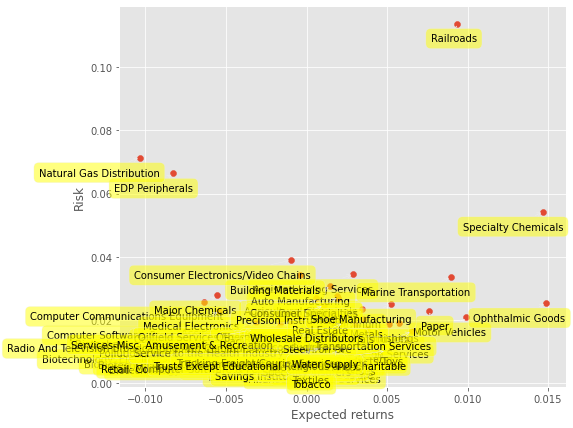

In [53]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))